In [1]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x1d27c5f4910>)

In [2]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\pook0/.cache\torch\hub\intel-isl_MiDaS_master
c:\ProgramData\anaconda3\envs\Midas\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print(device)

cpu


In [4]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\pook0/.cache\torch\hub\intel-isl_MiDaS_master


In [5]:
img = cv2.imread('./assets\R78.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [6]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

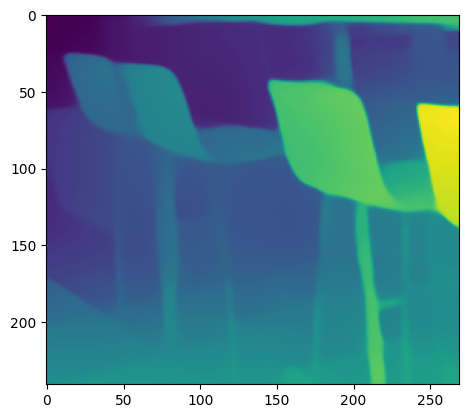

In [7]:
plt.imshow(output)
# plt.show()

Depth predictions shape: torch.Size([1, 352, 384])


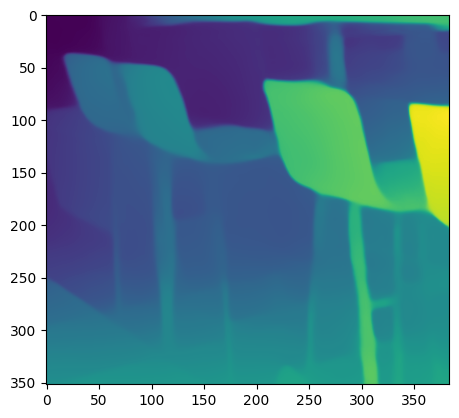

In [28]:
# 입력 이미지 로드
image_path = './assets\R78.JPG'
input_image = cv2.imread(image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
#input_image = torch.from_numpy(input_image).unsqueeze(0).float() / 255.0
input_batch = transform(input_image).to(device)

# 멀티 스케일 아키텍처를 사용한 depth 추출
depth_predictions = midas.forward(input_batch)

# 추출된 depth 정보 출력
print("Depth predictions shape:", depth_predictions.shape)

# 원하는 스케일의 depth 정보를 가져오기
desired_scale = 0  # 원하는 스케일 설정 (예: 2)
desired_depth = depth_predictions[desired_scale]

# 추출된 depth 정보를 이미지로 저장
depth_image = desired_depth.squeeze().detach().cpu().numpy()
cv2.imwrite('depth_output.jpg', (depth_image * 255).astype('uint8'))
plt.imshow(depth_image)
